In [1]:
# Import libararies

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# _URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
# path_to_zip = tf.keras.utils.get_file('/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs.zip', origin=_URL, extract=True)

In [ ]:
# PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip')
# New_PATH="/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs"
# !unzip $PATH -d $New_PATH

In [12]:
dataPath="/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered"
dataPath


'/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered'

In [13]:
! ls $dataPath

train  validation  vectorize.py


In [14]:
train_dir = os.path.join(dataPath,'train')
validation_dir = os.path.join(dataPath,'validation')

In [15]:
train_cats_dir = os.path.join(train_dir,'cats') # Directory with our training cat pics
train_dogs_dir = os.path.join(train_dir,'dogs') # Directory with our training dogs pics
validation_cats_dir = os.path.join(validation_dir,'cats') # Directory with our validation cats pics
validation_dogs_dir = os.path.join(validation_dir,'dogs') # Directory with our validation dogs pics

In [16]:
num_cat_tr =  len(os.listdir(train_cats_dir))
num_dog_tr =  len(os.listdir(train_dogs_dir))
num_cat_val =  len(os.listdir(validation_cats_dir))
num_dog_val =  len(os.listdir(validation_dogs_dir))

total_train = num_cat_tr + num_dog_tr
total_val = num_cat_val + num_dog_val

In [17]:
print('total training cat images :',num_cat_tr)
print('total training dog images :',num_dog_tr)
print("=======================================")
print('total validation cat images :',num_cat_val)
print('total validation dog images :',num_dog_val)
print("=======================================")
print(f"total training images : {total_train}")
print(f"total validation images : {total_val}")

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total training images : 2000
total validation images : 1000


In [18]:
batch_size= 128 # power of 2 --> 64, 128, 256, 512
epochs=30
IMG_HEIGHT = 150
IMG_WIDTH = 150


In [19]:
train_image_generator = ImageDataGenerator(rescale=1./255) # generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # generator for our validation data

In [20]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


In [21]:
validation_data_gen= validation_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = validation_dir,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, check = next(train_data_gen)

In [ ]:
len(sample_training_images)

128

In [ ]:
check

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
#sample_training_images[4]

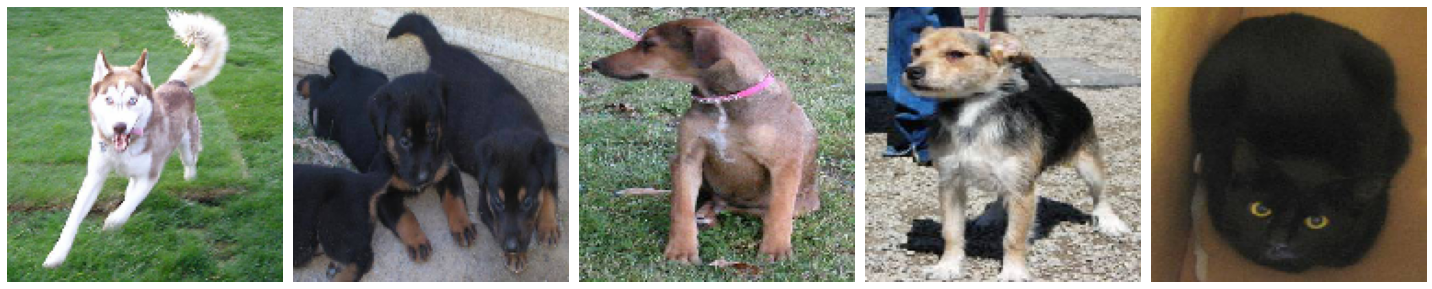

In [ ]:
plotImages(sample_training_images[4:9])

In [12]:
# Let trains

model = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
2000//128

15

In [15]:
# Model fit

history = model.fit( train_data_gen,
                    steps_per_epoch=total_train//batch_size,
                    epochs=10,
                    validation_data=validation_data_gen,
                    validation_steps=total_val//batch_size
    
)

Epoch 1/10
15/15 [==============================] - 376s 25s/step - loss: 0.8492 - accuracy: 0.4936 - val_loss: 0.6908 - val_accuracy: 0.4944
Epoch 2/10
15/15 [==============================] - 12s 797ms/step - loss: 0.6890 - accuracy: 0.4984 - val_loss: 0.6806 - val_accuracy: 0.4989
Epoch 3/10
15/15 [==============================] - 12s 788ms/step - loss: 0.6752 - accuracy: 0.5331 - val_loss: 0.6845 - val_accuracy: 0.5045
Epoch 4/10
15/15 [==============================] - 12s 796ms/step - loss: 0.6640 - accuracy: 0.5481 - val_loss: 0.6650 - val_accuracy: 0.5145
Epoch 5/10
15/15 [==============================] - 12s 797ms/step - loss: 0.6236 - accuracy: 0.6159 - val_loss: 0.6245 - val_accuracy: 0.6373
Epoch 6/10
15/15 [==============================] - 12s 791ms/step - loss: 0.5860 - accuracy: 0.6645 - val_loss: 0.6313 - val_accuracy: 0.6685
Epoch 7/10
15/15 [==============================] - 13s 863ms/step - loss: 0.5321 - accuracy: 0.7051 - val_loss: 0.5689 - val_accuracy: 0.7154


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

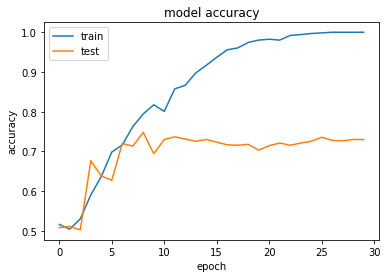

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

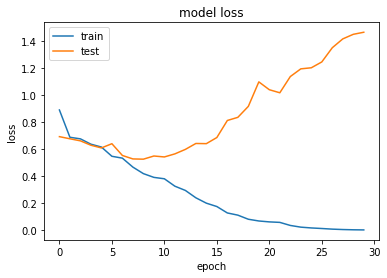

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
import math

def sigmoid(x):
  return 1/ (1+ math.exp(-x))
# Predict with new data
img_size=(150,150)

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/test/cat_1.jpg")
im = im.resize(img_size)
im = np.expand_dims(im,axis=0)
im = np.array(im)
im = im/255
pred = model.predict([im])
pred =sigmoid(pred[0][0])
if pred >=0.5:
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("cat")




cat


In [52]:
# Saving the model

model.save("/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/catVSdog_clf.h5")


In [3]:
from keras.models import load_model

model_h5 = load_model("/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/catVSdog_clf.h5")

In [5]:
import math

def sigmoid(x):
  return 1/ (1+ math.exp(-x))
# Predict with new data
img_size=(150,150)

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/LuminarTechnolabs/AI/Deep_Learning/CNN/test/cat_1.jpg")
im = im.resize(img_size)
im = np.expand_dims(im,axis=0)
im = np.array(im)
im = im/255
pred = model_h5.predict([im])
pred =sigmoid(pred[0][0])
if pred >=0.5:
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("cat")



cat


In [22]:
 train_data_gen.class_indices 

{'cats': 0, 'dogs': 1}

In [ ]:
## Data Augmentation


In [ ]:
# 1. Horizontal Flip

train_images_horizontal = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_images_horizontal_gen= train_images_horizontal.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


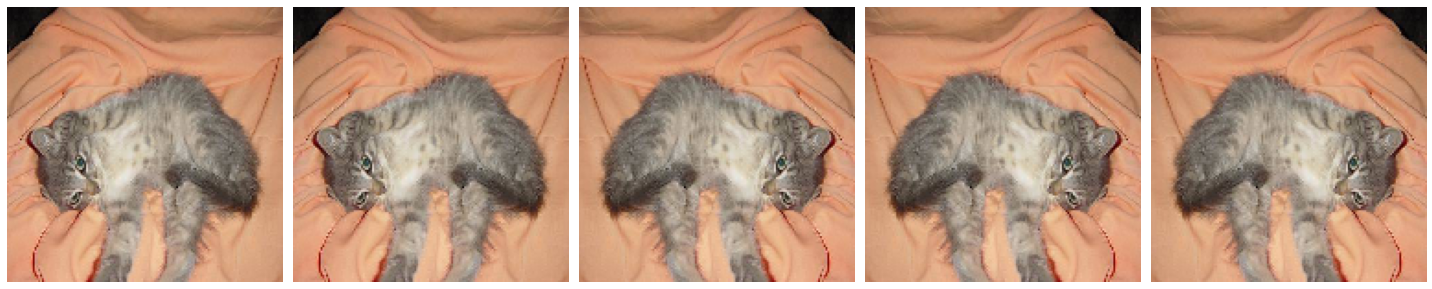

In [ ]:
augmented_images = [train_images_horizontal_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


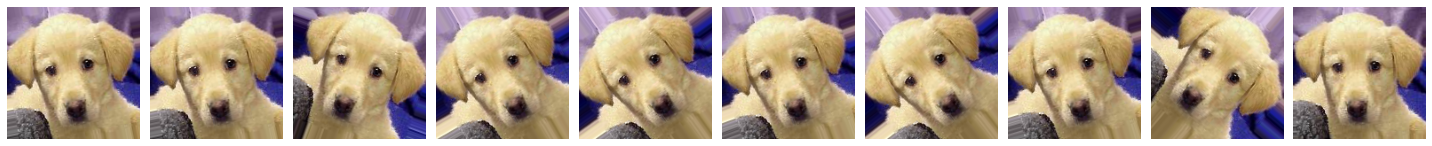

In [ ]:
# 2. Rotate the image

train_images_rotation = ImageDataGenerator(rescale=1./255,rotation_range=45)
train_images_rotationl_gen= train_images_rotation.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

augmented_images = [train_images_rotationl_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


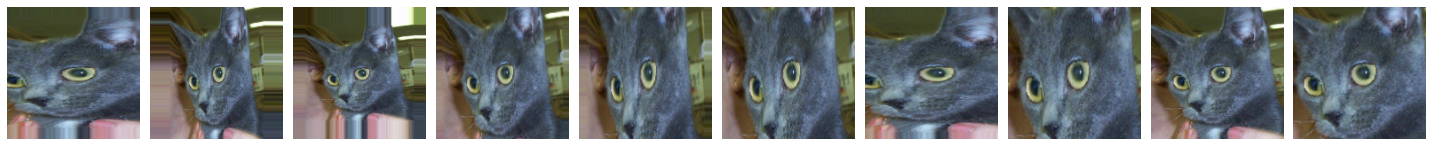

In [ ]:
# 2. zoom the image

train_images_zoom = ImageDataGenerator(rescale=1./255,zoom_range=0.5)
train_images_zoom_gen= train_images_zoom.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

augmented_images = [train_images_zoom_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           horizontal_flip=True,
                                           zoom_range=0.5,
                                           width_shift_range=.15,
                                           height_shift_range=0.15) # generator for our training data

In [ ]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


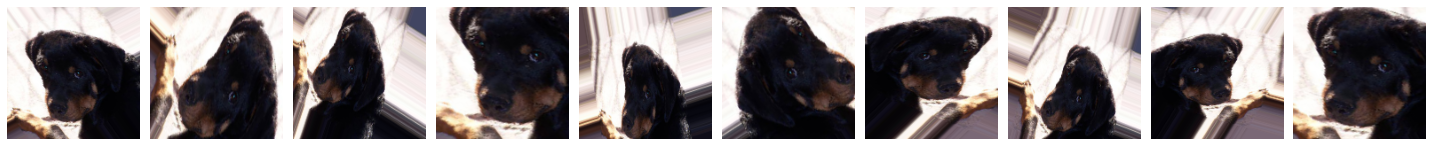

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [ ]:
#Let trains
# Dropout

model_new = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1)
])

In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [ ]:
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)       

In [ ]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=100,
    validation_data=validation_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/100
15/15 [==============================] - 20s 1s/step - loss: 0.5514 - accuracy: 0.6880 - val_loss: 0.5470 - val_accuracy: 0.6663
Epoch 2/100
15/15 [==============================] - 20s 1s/step - loss: 0.5491 - accuracy: 0.7030 - val_loss: 0.5379 - val_accuracy: 0.7087
Epoch 3/100
15/15 [==============================] - 21s 1s/step - loss: 0.5418 - accuracy: 0.7031 - val_loss: 0.5449 - val_accuracy: 0.6808
Epoch 4/100
15/15 [==============================] - 20s 1s/step - loss: 0.5460 - accuracy: 0.6934 - val_loss: 0.5454 - val_accuracy: 0.6708
Epoch 5/100
15/15 [==============================] - 20s 1s/step - loss: 0.5613 - accuracy: 0.6838 - val_loss: 0.5990 - val_accuracy: 0.6150
Epoch 6/100
15/15 [==============================] - 20s 1s/step - loss: 0.5680 - accuracy: 0.6818 - val_loss: 0.5827 - val_accuracy: 0.6518
Epoch 7/100
15/15 [==============================] - 21s 1s/step - loss: 0.5578 - accuracy: 0.6816 - val_loss: 0.5442 - val_accuracy: 0.6875
Epoch 8/100
1